# Public Schools SAT Scores

<img src="sat-test-sections.jpg" alt="SAT">

Selecting top schools in New York is vital for students' academic growth and future prospects. These institutions offer superior education, advanced facilities, and enhanced opportunities for higher education. While school location can influence resources and environment, factors like dedicated staff and community support also play significant roles in student achievement. Prioritizing educational excellence and addressing disparities can ensure all students access quality education regardless of location.

## This analysis answers the following questions:
Does the location of university affect the success of students measured in SAT score?

In [9]:
# importing neccessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# reading .csv file
schools = pd.read_csv("schools.csv")
schools

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5
372,Channel View School for Research,Queens,Q410,427,430,423,76.6
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5


Data Cleaning:

In [11]:
# Dropping Nulls
schools.dropna(inplace=True)

Adding a column of total SAT scores for all 3 parts

In [12]:
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

In order to see whether the sample is representative, let's count the number of borough's appearing the dataset. Staten Island appears only 9 times, which does not follow the principle that the sample should be bigger than 30. That means that it can  excluded from the boroughs:

In [13]:
schools["borough"].value_counts()

borough
Brooklyn         104
Bronx             93
Manhattan         84
Queens            65
Staten Island      9
Name: count, dtype: int64

Furthermore, only the schools where more than 60% of students tested.

In [14]:
schools = schools[(schools["borough"] != "Staten Island") & (schools["percent_tested"] >= 60)]

## Math Scores
Firstly, the math test scores will be examined.

In [15]:
schools_math = schools[["school_name", "borough", "average_math", "percent_tested"]]
schools_math_avg = schools_math.groupby('borough')[["average_math"]].mean().round(2).sort_values(by="average_math", ascending=False).reset_index()
overall_avg_score_math = schools_math_avg["average_math"].mean()
schools_math_avg

,borough,average_math
0,Queens,486.78
1,Manhattan,480.48
2,Brooklyn,438.79
3,Bronx,425.07


According to the following table the Queens borough has the highest avergae SAT math score.

The mean and the median will be compared against each other, as the data is skewed, thus the mean is highly affected by it.

In [16]:
total_math = schools_math.groupby("borough")["average_math"].agg(["count", "mean", "median", "std"]).round(2).reset_index()
total_math_sorted = total_math.sort_values(by='count', ascending=True)
total_math

,borough,count,mean,median,std
0,Bronx,41,425.07,408.0,71.63
1,Brooklyn,57,438.79,420.0,69.75
2,Manhattan,60,480.48,453.0,84.44
3,Queens,45,486.78,478.0,73.33


Visualisation of the previous conclusions.

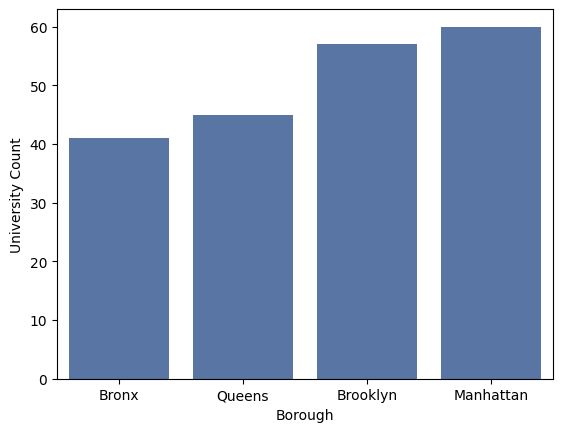

In [35]:
sns.set_palette("deep")

ax = sns.barplot(data=total_math_sorted, x='borough', y='count')
ax.set(xlabel="Borough", ylabel="University Count")
plt.show()

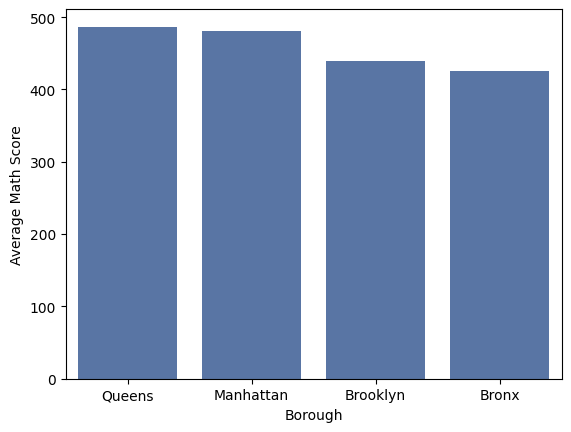

In [34]:
ax = sns.barplot(data=schools_math_avg, x="borough", y="average_math")
ax.set(xlabel="Borough", ylabel="Average Math Score")
plt.show()

According to the dataset, the best average performing Math SAT scores are at <b>Queens</b>.

Top 5 best schools math SAT score:

In [36]:
top_10_schools_math = schools_math.groupby("school_name", as_index=False)[["borough","school_name", "average_math"]].head(5)
top_10_schools_math.head(5)

,borough,school_name,average_math
1,Manhattan,Essex Street Academy,395
2,Manhattan,Lower Manhattan Arts Academy,418
3,Manhattan,High School for Dual Language and Asian Studies,613
5,Manhattan,Bard High School Early College,634
6,Manhattan,Urban Assembly Academy of Government and Law,389


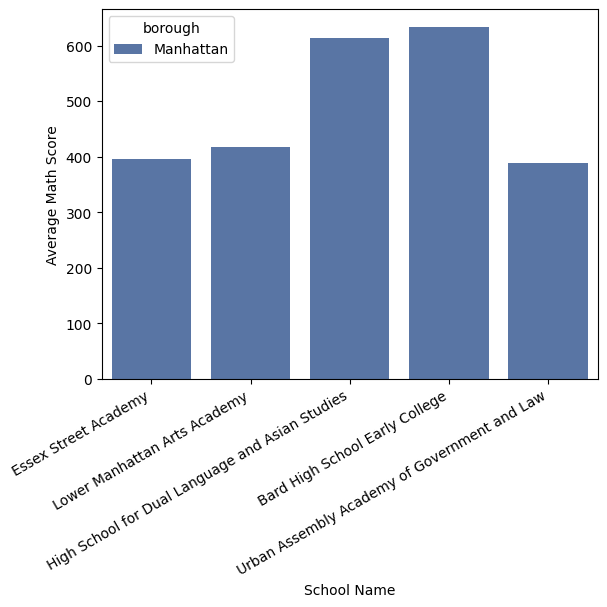

In [38]:
ax = sns.barplot(data=top_10_schools_math.head(), x="school_name", y="average_math", hue="borough")
ax.set(xlabel="School Name", ylabel="Average Math Score")
plt.xticks(rotation=30, ha="right")
plt.show()

The best performing schools for math SAT average are all located in <b>Manhattan</b>.

## Reading Scores
Firstly, the math test scores will be examined.

In [21]:
schools_reading = schools[["school_name", "borough", "average_reading"]]
schools_reading_avg = schools_reading.groupby('borough')[["average_reading"]].mean().round(2).reset_index()
overall_avg_score_reading = schools_reading_avg["average_reading"].mean()
schools_reading_avg

,borough,average_reading
0,Bronx,420.24
1,Brooklyn,427.65
2,Manhattan,466.63
3,Queens,463.38


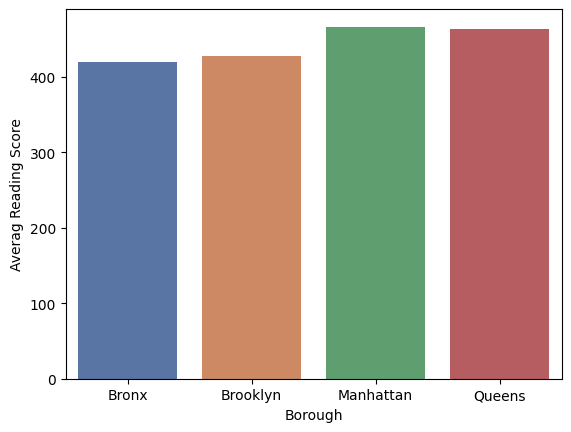

In [39]:
ax = sns.barplot(data=schools_reading_avg, x="borough", y="average_reading", hue="borough", legend=False)
ax.set(xlabel="Borough", ylabel="Averag Reading Score")
plt.show()

According to the analysis, <b>Manhattan</b> is approximately at the same level as <b>Queens</b>.

In [23]:
top_10_schools_reading = schools_reading.groupby("school_name", as_index=False)[["borough", "school_name", "average_reading"]].head(5)
top_10_schools_reading.head(5)

,borough,school_name,average_reading
1,Manhattan,Essex Street Academy,411
2,Manhattan,Lower Manhattan Arts Academy,428
3,Manhattan,High School for Dual Language and Asian Studies,453
5,Manhattan,Bard High School Early College,641
6,Manhattan,Urban Assembly Academy of Government and Law,395


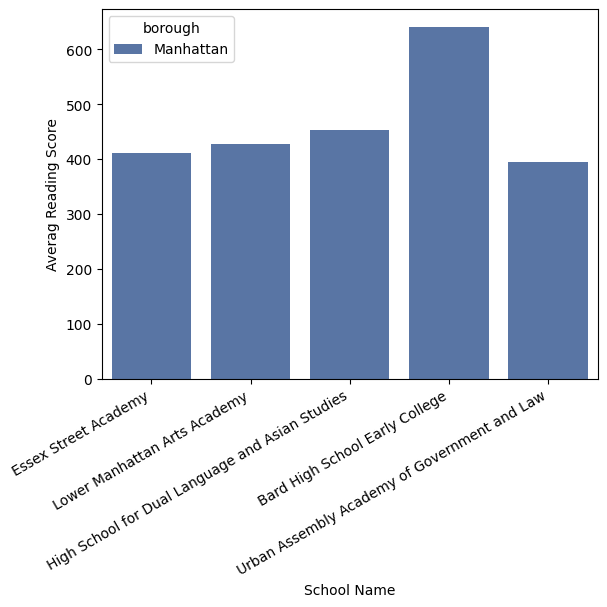

In [43]:
ax = sns.barplot(data=top_10_schools_reading.head(), x="school_name", y="average_reading", hue="borough")
plt.xticks(rotation=30, ha="right")
ax.set(xlabel="School Name", ylabel="Averag Reading Score")
plt.show()

All of the best schools are located in <b>Manhattan</b>.

## Writing Scores

In [25]:
schools_writing = schools[["school_name", "borough", "average_writing", "percent_tested"]]
schools_writing_avg = schools_writing.groupby('borough')[["average_writing", "percent_tested"]].mean().round(2).reset_index()
overall_avg_score_reading = schools_writing_avg["average_writing"].mean()
schools_writing_avg

,borough,average_writing,percent_tested
0,Bronx,414.32,76.82
1,Brooklyn,419.56,74.31
2,Manhattan,461.28,80.35
3,Queens,461.82,80.15


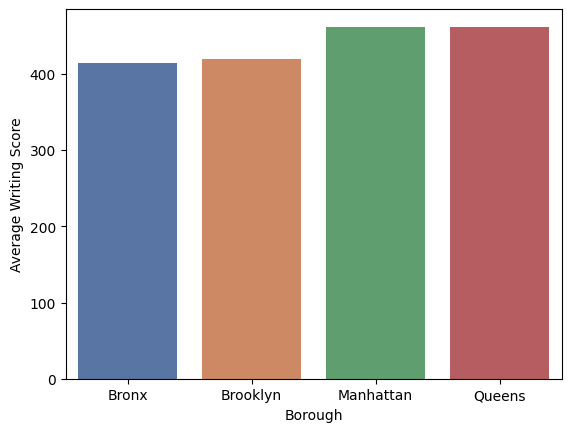

In [42]:
ax = sns.barplot(data=schools_writing_avg, x="borough", y="average_writing", hue="borough", legend=False)
ax.set(xlabel="Borough", ylabel="Average Writing Score")
plt.show()

In terms of borough both <b>Manhattan</B> and <b>Queens</b> are at the top in terms of SAT writing scores.

In [27]:
top_10_schools_writing = schools_writing.groupby("school_name", as_index=False)[["borough", "school_name", "average_writing"]].head(5)
top_10_schools_writing.head(5)

,borough,school_name,average_writing
1,Manhattan,Essex Street Academy,387
2,Manhattan,Lower Manhattan Arts Academy,415
3,Manhattan,High School for Dual Language and Asian Studies,463
5,Manhattan,Bard High School Early College,639
6,Manhattan,Urban Assembly Academy of Government and Law,381


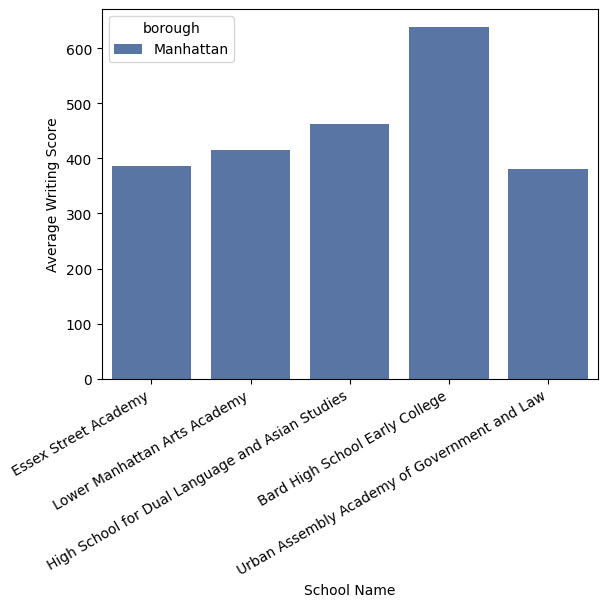

In [44]:
ax = sns.barplot(data=top_10_schools_writing.head(), x="school_name", y="average_writing", hue="borough")
plt.xticks(rotation=30, ha="right")
ax.set(xlabel="School Name", ylabel="Average Writing Score")
plt.show()

The best schools that performed the best at the SAT writing are located in <b>Manhattan</b>.

## Total Scores

Let's compare boroughs against each other in terms of total SAT score:

In [29]:
total_score = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "median"]).round(2)
total_score

,count,mean,median
borough,,,
Bronx,41,1259.63,1232.0
Brooklyn,57,1286.00,1246.0
Manhattan,60,1408.40,1346.0
Queens,45,1411.98,1368.0


The highest average score belongs to <b>Queens</b>. Visualization of the following finding below:

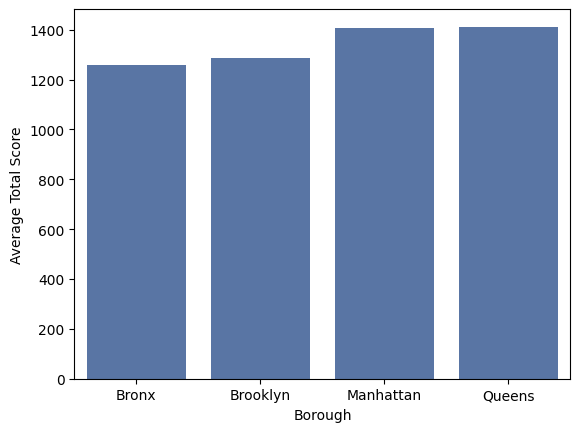

In [47]:
ax = sns.barplot(data=total_score, x="borough", y="mean")
ax.set(xlabel="Borough", ylabel="Average Total Score")
plt.show()

In [31]:
top_5_schools_total = schools.groupby("school_name", as_index=False)[["borough", "school_name", "total_SAT"]].head(5)
top_5_schools_total.head(5)

,borough,school_name,total_SAT
1,Manhattan,Essex Street Academy,1193
2,Manhattan,Lower Manhattan Arts Academy,1261
3,Manhattan,High School for Dual Language and Asian Studies,1529
5,Manhattan,Bard High School Early College,1914
6,Manhattan,Urban Assembly Academy of Government and Law,1165


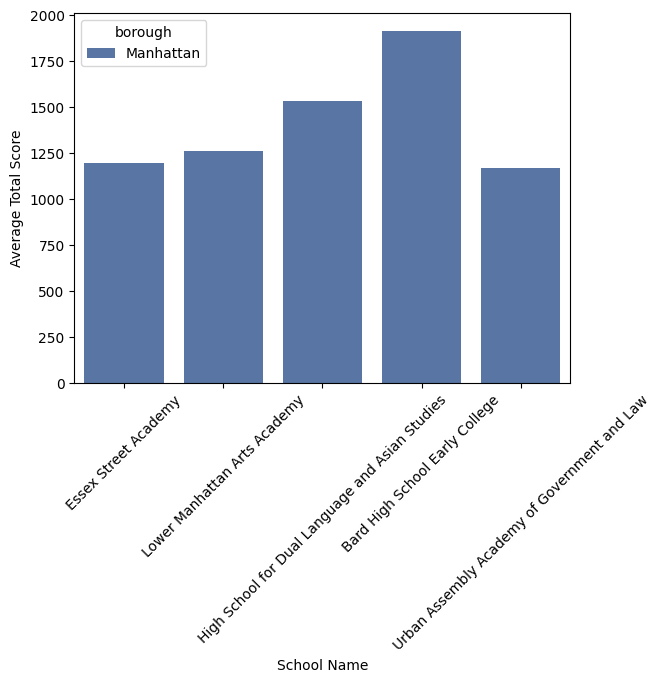

In [48]:
ax = sns.barplot(data=top_5_schools_total.head(5), x="school_name", y="total_SAT", hue="borough")
ax.set(xlabel="School Name", ylabel="Average Total Score")
plt.xticks(rotation=45)
plt.show()

All of the school are at <b>Manhattan</b> borough, with Bard High School Early College at the top with 1914 total average score.

# Conclusion

It can be concluded that location greatly affects the performance of students who took the SAT. For instance, the best schools for math, reading, writing, and total SAT scores are the highest in <b>Manhattan</b>. Although schools in Staten Island had high scores, the relatively small number of universities makes the sample unrepresentative. Thus, making <b>Queens</b> the best in terms of average math score and average writing score, and <b>Manhattan</b> the best in average reading score. Therefore, if a student is from <b>Queens</b>, there is a high chance that they would outperform students from other schools. However, the best-rated schools are located in <b>Manhattan</b>. So, the answer to the question is clear: location heavily affects the result of an SAT test.